In [3]:
import json
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#coursera metadata
c_courselist = json.load(open('./data/coursera_courses.json'))

# extract the categories -- elements are unique
c_catnames = {ele['name'] for ele in c_courselist['linked']['categories']}

# pull in wikibooks XML
et = ET.parse('./data/wikibooks/enwikibooks-20150603-pages-articles-multistream.xml')
root = et.getroot()

In [5]:
def add_ns(tag, namespace='{http://www.mediawiki.org/xml/export-0.10/}'):
    """add namespace prefix to tag"""
    return namespace+tag

In [6]:
# root.findall(add_ns('page')) gets all page nodes

# find all title nodes for all pages
title_nodes = root.findall("./%s/%s" % (add_ns('page'), add_ns('title')))

In [7]:
# get titles from each title node
title_list = [title.text for title in title_nodes]
print titles[:5]
# notice how there's a / structure. 
# Organic chemistry
# Organic chemistry/concept 1
# Organic chemistry/concept 2

# Idea: find all concept paths
# Create tree based on splitting on '/'
# len(split) is depth of tree

['Main Page', 'Organic Chemistry/Cover', 'Organic Chemistry/Foundational concepts of organic chemistry', 'Organic Chemistry/Introduction to reactions', 'Organic Chemistry/Alkenes']


In [8]:
derived_only = [title for title in title_list if '/' in set(title)]

In [9]:
derived_only_no_cookbooks = \
[title for title in derived_only if not title.startswith('Cookbook:')]

In [10]:
titles_split = [title.split('/') for title in derived_only_no_cookbooks]

In [11]:
split_size = [len(split) for split in titles_split]
print max(split_size) #29

29


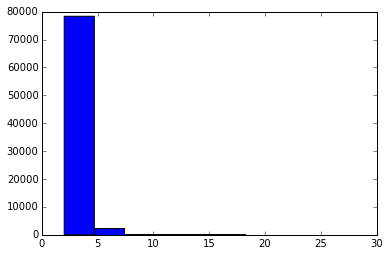

In [13]:
plt.hist(split_size)
plt.show()

In [15]:
for i, size in enumerate(split_size):
    if size > 5:
        print titles_split[i]
        
# mostly chess opening theory, or excessively nested structure
# will leave it alone for now, as these nodes will likely not get used in later implementations
# potentially will res

['C++ Programming', 'Programming Languages', 'C++', 'Code', 'Statements', 'Flow Control']
['FHSST Biology', 'Contents', 'Index', 'SCP', 'Energy', 'Photosynthesis']
['FHSST Biology', 'Contents', 'Index', 'DCC', 'Origin of species', 'Theories', 'Evolution']
['FHSST Biology', 'Contents', 'Index', 'ES', 'Ecosystems', 'Biospheres, biomes and ecosystems']
['FHSST Biology', 'Contents', 'Index', 'ES', 'Ecosystems', 'Resources']
['FHSST Biology', 'Contents', 'Index', 'ES', 'Ecosystems', 'Resources', 'Energy flow within environments']
['FHSST Biology', 'Contents', 'Index', 'ES', 'Human Influence', 'Air']
['FHSST Biology', 'Contents', 'Index', 'ES', 'Human Influence', 'Water']
['FHSST Biology', 'Contents', 'Index', 'ES', 'Human Influence', 'Land']
['FHSST Biology', 'Contents', 'Index', 'ES', 'Ecosystems', 'Resources', 'Biotic (living) and Abiotic (non-living) resources']
['Chess Opening Theory', '1. e4', '1...e5', '2. Nf3', '2...Nc6', '3. Bc4']
['Chess Opening Theory', '1. e4', '1...e5', '2. Nf3'

In [16]:
import networkx as nx

In [17]:
G = nx.Graph()

In [20]:
# add each unique list element as a node
# iterate through the list creating edges from one item to the item to its right

titles_split[0]

['Organic Chemistry', 'Cover']

In [25]:
test1 = set(titles_split[0])
test2 = set(titles_split[1])
print test1
print test2

set(['Organic Chemistry', 'Cover'])
set(['Organic Chemistry', 'Foundational concepts of organic chemistry'])


In [42]:
unique_elements = set()
for title in titles_split:
    unique_elements = unique_elements.union(title)

In [43]:
len(unique_elements)

58939

In [48]:
node_concept_dict = {k: v for k,v in enumerate(unique_elements)}
G.add_edge

In [49]:
G.add_nodes_from(node_concept_dict.keys())

In [50]:
dg = nx.DiGraph()
dg.add_nodes_from(unique_elements)            

In [51]:
for concept_list in titles_split:
    dg.add_path(concept_list)

{'': 106,
 'Talk:Computer Science:Advanced Data Structures and Algorithms': 1,
 'Individual styling for each module position': 1,
 'rownonote': 1,
 'Modern OpenGL Tutorial 03': 1,
 'Modern OpenGL Tutorial 02': 1,
 'Modern OpenGL Tutorial 05': 1,
 'Poetry': 2,
 'Modern OpenGL Tutorial 07': 1,
 'Modern OpenGL Tutorial 06': 1,
 'Java IDEs': 1,
 'Electroplating': 1,
 'posper location': 1,
 'Nuclear Medicine Imaging Systems': 1,
 'Business Continuity Management': 3,
 'The Live-CD': 1,
 'Standard Attributes List': 1,
 'Joypad Input': 1,
 'rowtopUSre': 1,
 'Variables & Intro to Control Statements for C++': 1,
 'Subsistence of Copyright': 1,
 'Front Display': 1,
 'Death Eaters': 1,
 'Madeira Islands': 1,
 'MCSE-004 Numerical and Statistical Computing': 1,
 'statute': 2,
 'MMBtu-th': 1,
 'Magnetic effects of a current': 1,
 'Secularism': 1,
 'Simulation of the Visual System': 1,
 'Include Image': 1,
 'Modern OpenGL Tutorial 04': 1,
 'Open Assessment': 2,
 'Methods Manual for Salt Lake Studies':